<a href="https://colab.research.google.com/github/manhhungtr211/LLMProject-TextClassification/blob/main/sentiment_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q datasets peft requests torch bitsandbytes transformers trl accelerate sentencepiece matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datasets import load_dataset, concatenate_datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np


In [4]:
# Tải Emotion
raw_dataset = load_dataset("emotion")

# Gộp train và test thành một tập duy nhất
dataset = concatenate_datasets([raw_dataset["train"], raw_dataset["validation"], raw_dataset["test"]])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
df = dataset.to_pandas()

# Data Exploration

In [ ]:
print(df.head())

In [7]:
df.shape

(20000, 2)

In [8]:
df["label"].shape[0]

20000

In [9]:
# How many labels are there?
length = df["label"].shape[0]
print(f"There are {length} labels in the dataset")

# How many unique labels are there?
unique_labels = df["label"].nunique()
print(f"There are {unique_labels} unique labels in the dataset")

There are 20000 labels in the dataset
There are 6 unique labels in the dataset


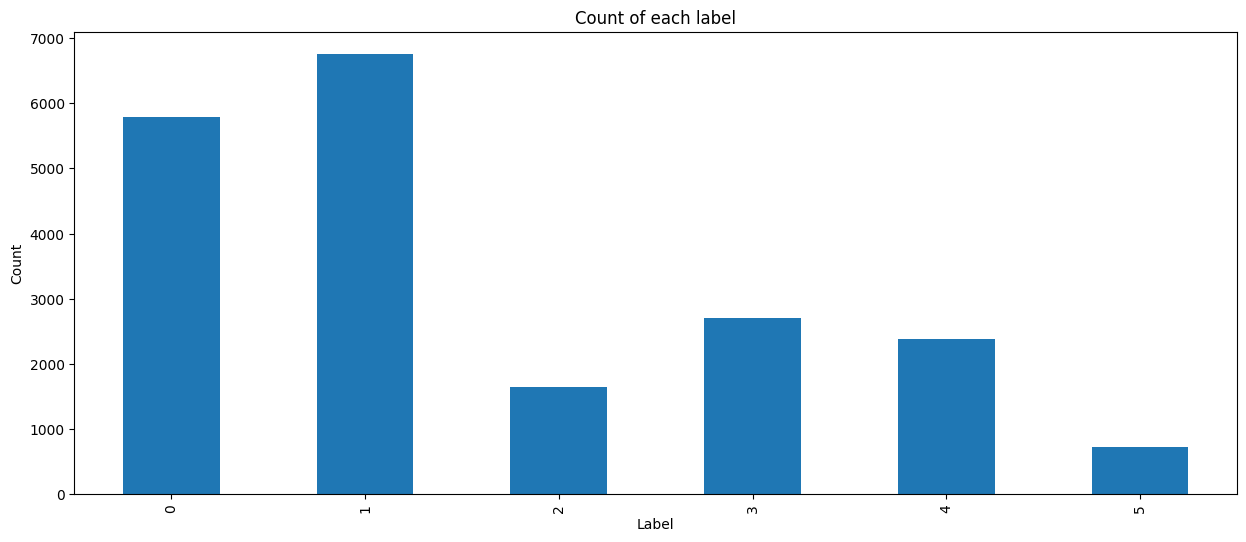

In [10]:
# Plotting the distribution of labels
label_count = df["label"].value_counts().sort_index()
plt.figure(figsize=(15, 6))
label_count.plot(kind='bar')
plt.title("Count of each label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [ ]:
# Explore length of the text
sentences = []
for _, data in df.iterrows():
    try:
        sentences.append(len(data["text"]))
    except ValueError:
        pass

In [ ]:
# Plot lengths of the sentences
plt.figure(figsize=(15, 6))
plt.title(f"Length: Avg {sum(sentences)/len(sentences):,.0f} and highest {max(sentences)}")
plt.xlabel("Length of sentences")
plt.ylabel("Count")
plt.hist(sentences, rwidth=0.7, color="lightblue", bins=range(0, 350, 5))
plt.show()

In [ ]:
# Plot lengths of the sentences
plt.figure(figsize=(15, 6))
plt.title(f"Length: Avg {sum(sentences)/len(sentences):,.0f} and highest {max(sentences)}")
plt.xlabel("Length of sentences")
plt.ylabel("Count")
plt.hist(sentences, rwidth=0.7, color="lightblue", bins=range(0, 350, 5))
plt.show()

In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
train_dataset, temp_data = train_test_split(df, test_size=0.2, random_state=42)
val_dataset, test_dataset = train_test_split(temp_data, test_size=0.5, random_state=42)

In [ ]:
train_data_path = 'train.csv'
val_data_path = 'val.csv'
test_data_path = 'test.csv'

In [17]:
train_dataset.to_csv(train_data_path, index=False)
val_dataset.to_csv(val_data_path, index=False)
test_dataset.to_csv(test_data_path, index=False)

# Load data

In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset('csv', data_files={'train': train_data_path, 'validation': val_data_path, 'test': test_data_path})

In [ ]:
train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']

# Tokenizer

In [ ]:
from transformers import DistilBertTokenizer
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased',cache_dir='./all_models')

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenizer_train = train_dataset.map(preprocess_function)
tokenizer_val = val_dataset.map(preprocess_function)
tokenizer_test = test_dataset.map(preprocess_function)

In [ ]:
tokenizer_train

In [25]:
tokenizer_val

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
})

In [ ]:
tokenizer_test

In [ ]:
print(type(tokenizer_train))

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training model

In [ ]:
from transformers import AutoModelForSequenceClassification
import numpy as np
from datasets import load
from transformers import TrainingArguments, Trainer
from huggingface_hub import notebook_login
import torch

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=6, cache_dir='./all_models')

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted', pos_label=0)
    cm = confusion_matrix(labels, preds, labels=[0, 1, 2, 3, 4, 5])

    acc = accuracy_score(labels, preds)
    return {
        'y_true': labels,
        'y_pred': preds,
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': cm
    }


In [32]:
repo_name = "sentiment_model"

train_args = TrainingArguments(
    output_dir=repo_name,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    warmup_steps=100,
    logging_steps=50,
    fp16=True,
    push_to_hub=False,
    report_to="none"
)


In [ ]:
trainer = Trainer(
    model=model,
    args=train_args,
    train_dataset=tokenizer_train,
    eval_dataset=tokenizer_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


In [ ]:
train_results = trainer.train()

In [ ]:
print(train_results)

# Compute the evaluation metrics

In [ ]:
eval_results = trainer.evaluate()

In [ ]:
print(eval_results)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cm = eval_results['eval_confusion_matrix']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [40]:
test_results = trainer.evaluate(eval_dataset=tokenizer_test)
print(test_results)

{'eval_loss': 0.19128729403018951, 'eval_y_true': array([4, 4, 4, ..., 3, 4, 1]), 'eval_y_pred': array([4, 4, 4, ..., 3, 4, 1]), 'eval_accuracy': 0.9325, 'eval_f1': 0.9324107800029805, 'eval_precision': 0.9324591075258666, 'eval_recall': 0.9325, 'eval_confusion_matrix': array([[567,   6,   0,   6,  11,   0],
       [  5, 627,  23,   2,   1,   0],
       [  1,  25, 148,   0,   0,   0],
       [  8,   1,   0, 262,   6,   0],
       [  7,   1,   0,   8, 196,  14],
       [  1,   5,   0,   0,   4,  65]]), 'eval_runtime': 1.3751, 'eval_samples_per_second': 1454.399, 'eval_steps_per_second': 90.9, 'epoch': 3.0}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [41]:
cm = test_results['test_confusion_matrix']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

KeyError: 'test_confusion_matrix'